## Cats vs Dogs Image Classification using CNN

In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import shutil

import matplotlib.pyplot as plt
%matplotlib inline

```
dogs_cats_sample_5000
│
├── train
│   ├── cats - 5000 img
│   └── dogs - 5000 img
└── valid
    ├── cats - 1000 img
    └── dogs - 1000 img
```

In [19]:
from keras import layers
from keras import models
## Define ConvNet architecture
# Increase number of filters progressively over network depth
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# Generators to process images from directories in batches
train_datagen = ImageDataGenerator(rescale=1/255) # rescale pixel values
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
   'dogs_cats_sample_5000/train',
    target_size=(150,150), #Resize img to 150 x 150
    batch_size=20,
    class_mode='binary',
)

validation_generator = train_datagen.flow_from_directory(
   'dogs_cats_sample_5000/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [23]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 30,
    validation_data=validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_1_2.h5')

Epoch 1/30
100/100 [==============================] - 87s 873ms/step - loss: 0.6878 - acc: 0.5430 - val_loss: 0.6261 - val_acc: 0.6350
Epoch 2/30
100/100 [==============================] - 83s 829ms/step - loss: 0.6579 - acc: 0.6120 - val_loss: 0.7437 - val_acc: 0.5900
Epoch 3/30
100/100 [==============================] - 83s 831ms/step - loss: 0.6337 - acc: 0.6515 - val_loss: 0.6120 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 84s 844ms/step - loss: 0.5950 - acc: 0.6860 - val_loss: 0.6738 - val_acc: 0.6960
Epoch 5/30
100/100 [==============================] - 83s 828ms/step - loss: 0.5779 - acc: 0.6925 - val_loss: 0.6335 - val_acc: 0.7180
Epoch 6/30
100/100 [==============================] - 89s 894ms/step - loss: 0.5596 - acc: 0.7060 - val_loss: 0.4854 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 94s 943ms/step - loss: 0.5405 - acc: 0.7275 - val_loss: 0.5153 - val_acc: 0.7570
Epoch 8/30
100/100 [==============================] - 1

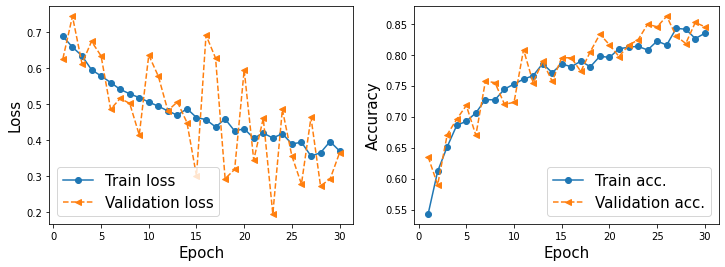

In [24]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['acc'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_acc'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

Приведенные выше графики показывают, что сеть переобучена обучающими данными; точность обучения почти идеальна, в то время как точность валидации колеблется примерно на 70%. Аналогичная тенденция наблюдается и в отношении кросс-энтропийных потерь.

Одним из способов избежать чрезмерной подгонки данных изображения является увеличение объема данных. Для этого мы можем добавить случайные преобразования к обучающим выборкам, чтобы наша модель лучше обобщалась.

Shape:  (150, 150, 3)


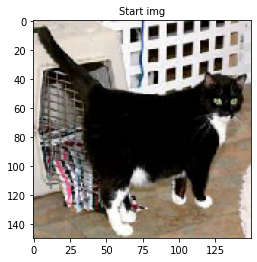

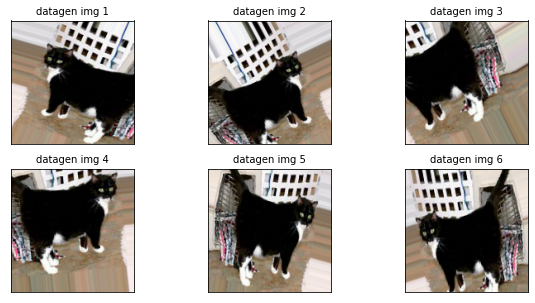

In [11]:
## Setup data augmentation img generator - random transformations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
import os
from keras.preprocessing import image
fnames = [os.path.join('dogs_cats_sample_5000/train/cats', fname) for
    fname in os.listdir('dogs_cats_sample_5000/train/cats')]

img_path = fnames[1]
raw_start_img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(raw_start_img)
plt.title('Start img', size=10)
start_img   = image.img_to_array(raw_start_img)
print ('Shape: ', start_img.shape)

x = start_img.reshape((1,) + start_img.shape)

fig = plt.figure(figsize=(10, 5))
i=0
for batch in datagen.flow(x, batch_size=1):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image.array_to_img(batch[0]))
    ax.set_title(f'datagen img {i+1}', size=10)
    i += 1
    if i % 6 == 0:
        break
plt.show()
del datagen, fnames, raw_start_img, x

Кроме того, можно изменить архитектуру сети, включив в нее отсевной слой, чтобы еще больше уменьшить переобучение.

In [26]:
# Modify ConvNet - Include dropout layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [27]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=9e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [28]:
# Retrain regularized model (data augmentation + dropout)
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255) # NO AUGMENTATION OF VAL DATA

train_generator = train_datagen.flow_from_directory(
    'dogs_cats_sample_5000/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    'dogs_cats_sample_5000/valid',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

# Save model
model.save('cats_and_dogs_small_2.h5')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6956 - acc: 0.5025 - val_loss: 0.6969 - val_acc: 0.4910
Epoch 2/30
100/100 [==============================] - 101s 1s/step - loss: 0.6906 - acc: 0.5240 - val_loss: 0.7063 - val_acc: 0.5530
Epoch 3/30
100/100 [==============================] - 96s 958ms/step - loss: 0.6797 - acc: 0.5610 - val_loss: 0.6363 - val_acc: 0.5800
Epoch 4/30
100/100 [==============================] - 98s 981ms/step - loss: 0.6680 - acc: 0.5880 - val_loss: 0.6093 - val_acc: 0.6270
Epoch 5/30
100/100 [==============================] - 98s 977ms/step - loss: 0.6583 - acc: 0.6050 - val_loss: 0.5828 - val_acc: 0.5930
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.6585 - acc: 0.6020 - val_loss: 0.7059 - val_acc: 0.5600
Epoch 7/30
100/100 [==============================] - 123s 1s/step - loss: 0.6499 - acc: 0.6130 - val_loss: 0.6

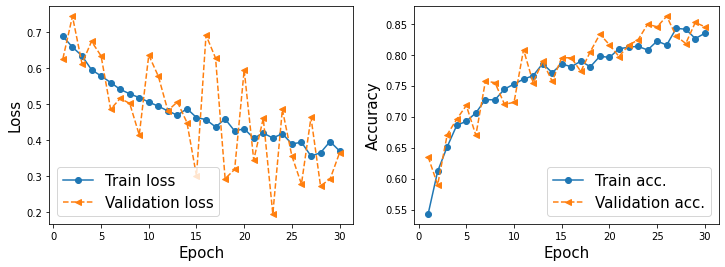

In [25]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['acc'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_acc'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()